### TP Détecteur de parole V1.0 ###
Scherrer Arthur, Mahouin Julien, Alexis Noliere, Nicolas Tachet



## Importation des librairies

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io.wavfile as sio
import scipy.stats as stats
from sklearn.mixture import GaussianMixture
import math

## Importation du fichier audio
On importe le fichier audio avec la librairie scipy.io.wavfile. On récupère le taux d'échantillonnage et le signal audio ainsi que ça durée.

In [82]:
sample,test = sio.read('test_2.wav')
print("Nombre d'échantillon par seconde", sample)
print("Nombre d'échantillon total",len(test))

# On cherche le temps en seconde du fichier audio
temps_seconde = len(test)/sample
print("Le temps du fichiers audio en seconde est de : ",temps_seconde)


Nombre d'échantillon par seconde 16000
Nombre d'échantillon total 57489603
Le temps du fichiers audio en seconde est de :  3593.1001875


On divise le signal audio par des fenêtre de 30ms avec un pas de 10 ms. 

In [83]:
#On divise le signal en fenêtre de 30ms
fenetre =30
fenetre_echantillon = int(fenetre*sample/1000)
print("Le nombre d'échantillon par fenêtre est de : ",fenetre_echantillon)

#On en déduit le nombre de fenêtre
nb_fenetre = int(len(test)/fenetre_echantillon)
print("Le nombre de fenêtre est de : ",nb_fenetre)

Le nombre d'échantillon par fenêtre est de :  480
Le nombre de fenêtre est de :  119770


La matrice est de dimension :  (119770, 480)
L'énergie totale de la matrice est de :  [18.3501931  19.75342678 18.57448836 ... 18.56318498 18.94371868
 18.6764075 ]


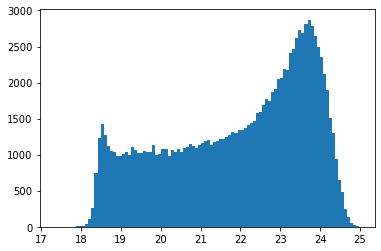

In [84]:
#On convertie le tableau en matrice avec strid avec 160 colonnes
matrice = np.lib.stride_tricks.as_strided(test, shape=(nb_fenetre, fenetre_echantillon), strides=(test.strides[0]*fenetre_echantillon, test.strides[0]))
print("La matrice est de dimension : ",matrice.shape)

#Calcul de l'énergie totale de la matrice
energie_test = np.sum(np.array(matrice, dtype='int64')**2,axis=1)
#Si l'energie est égale a 0 on le remplace par 1
energie_test[energie_test==0]=1
energie = np.log((energie_test))
print("L'énergie totale de la matrice est de : ",energie)

#historgramme de l'énergie
plt.hist(energie, bins=100)
plt.show()


### Question 3

À combien d’échantillons correspondent respectivement 30 et 10 ms ?

10 ms = 160, 30 ms = 480

# Étape 2 - Apprendre un GMM

In [85]:
# Distribution 1
x1 = np.random.normal(0, 1, 1000)
y1 = np.random.normal(0, 1, 1000)

# Distribution 2
x2 = np.random.normal(5, 1, 1000)
y2 = np.random.normal(5, 1, 1000)

# Création du modèle par concaténation
X = np.concatenate((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T), axis=0)

print(X)

[[-1.15780525 -0.83408586]
 [-0.60962047 -0.49471152]
 [-0.41602038 -0.70361839]
 ...
 [ 3.88556655  4.22627258]
 [ 4.67858028  6.75731232]
 [ 3.41279327  6.56774134]]


Création de l'objet GMM

In [86]:
gmm = GaussianMixture(n_components = 3, verbose = 10, max_iter = 10)
gmm.fit(X)

Initialization 0
Initialization converged: True	 time lapse 0.01646s	 ll -3.51364


GaussianMixture(max_iter=10, n_components=3, verbose=10)

Classe des nouvelles données

In [87]:
new_data = np.array([[0, 0], [5, 5]])
labels = gmm.predict(new_data)
print(labels)

[0 1]


Visualisation des résultats

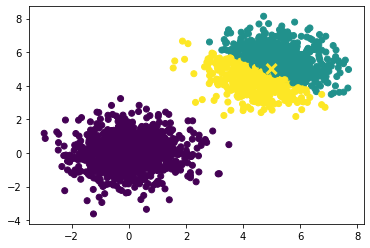

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X))
plt.scatter(new_data[:, 0], new_data[:, 1], c=labels, marker='x', s=100, linewidths=3)
plt.show()

### Question 5
quelle sera la dimension des gaussiennes ?
-> univariées
### Question 6
quelle est la méthode d'initialisation du modèle ?
-> np.concatenate() ?
### Question 7
À quoi correspondent les valeurs "change" dans la sortie de l'apprentissage ?
-> Changement de gaussienne
### Question 8
est-il important de fixer à diag ou full la forme des matrices de covariances ?
-> Oui, car si on fixe à diag, on considère que les variables sont indépendantes, ce qui n'est pas le cas ici.
### Question 9
quelle est la vraisemblance du modèle sur les données d'apprentissage ?


In [74]:
# Apprentissage d'un GMM sur les données
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=10, verbose=10)
test = gmm.fit(energie.reshape(-1, 1))

test_predict = test.predict(energie.reshape(-1, 1))


mu =  energie.means_
variance = energie.covariances_


sigma = math.sqrt(variance) # Error : only size-1 arrays can be converted to Python scalars

# Moyenne des gaussiennes
print("Moyenne des gaussiennes : ",test.means_)
# Variance des gaussiennes
print("Covariance des gaussiennes : ",test.covariances_)

#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

#x deviens un tableau 2D et non 3D
#x = x.reshape(-1, 1)

plt.plot(energie, stats.norm.pdf(energie, mu, sigma))

Initialization 0
Initialization converged: True	 time lapse 0.15540s	 ll -1.82209


AttributeError: 'numpy.ndarray' object has no attribute 'means_'

Initialization 0
Initialization converged: True	 time lapse 0.17869s	 ll -1.82210
Gaussienne 1 :
  Poids : 0.451
  Moyenne : 23.513
  Covariance : 0.307
Gaussienne 2 :
  Poids : 0.253
  Moyenne : 19.433
  Covariance : 0.500
Gaussienne 3 :
  Poids : 0.296
  Moyenne : 21.639
  Covariance : 0.580


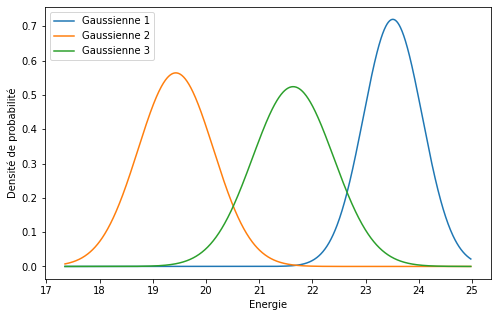

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Créer une instance de GMM avec 3 composantes, covariance complète et verbose à 10
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=10, verbose=10)

# Transformer le corpus d'énergies en un vecteur colonne
X = energie.reshape(-1, 1)

# Entraîner le modèle sur le corpus d'énergies
gmm.fit(X)

# Récupérer les paramètres des gaussiennes
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

# Afficher les paramètres de chaque gaussienne
for i in range(len(weights)):
    print(f"Gaussienne {i+1} :")
    print(f"  Poids : {weights[i]:.3f}")
    print(f"  Moyenne : {means[i][0]:.3f}")
    print(f"  Covariance : {covariances[i][0][0]:.3f}")

# Définir l'intervalle de valeurs pour lesquelles tracer les courbes
x = np.linspace(X.min(), X.max(), 1000)

# Tracer les courbes des gaussiennes
plt.figure(figsize=(8, 5))
for i in range(len(weights)):
    y = multivariate_normal.pdf(x, mean=means[i], cov=covariances[i])
    plt.plot(x, y, label=f"Gaussienne {i+1}")
plt.xlabel("Energie")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

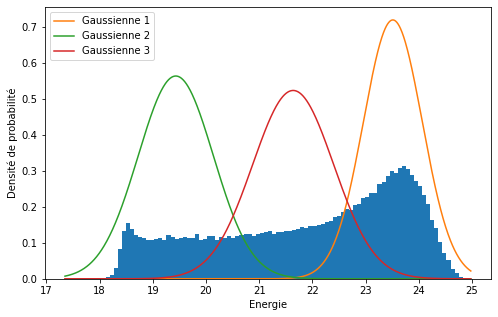

In [96]:
# On fussione l'histogramme et les courbes des gaussiennes
plt.figure(figsize=(8, 5))
plt.hist(X, bins=100, density=True)
for i in range(len(weights)):
    y = multivariate_normal.pdf(x, mean=means[i], cov=covariances[i])
    plt.plot(x, y, label=f"Gaussienne {i+1}")
plt.xlabel("Energie")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()

In [97]:
#Calcul de la médiane des gaussiennes
mediane = np.median(means)
print("La médiane des gaussiennes est de : ",mediane)

#Calcul de l'écart type
ecart_type = np.std(means)
print("L'écart type des gaussiennes est de : ",ecart_type)

silence = mediane - 2*ecart_type
print("Le seuil de silence est de : ",silence)


La médiane des gaussiennes est de :  21.639127090332202
L'écart type des gaussiennes est de :  1.667582038521166
Le seuil de silence est de :  18.30396301328987


In [100]:
#Toute les valeurs inférieurs au seuil de silence sont considérés comme du silence
#silence = energie[energie < silence]
#print("Le nombre de fenêtre de silence est de : ",len(silence))

'''
bruit = []
cpt = 0
for i in range(len(energie)):
    if energie[i] < silence:
        bruit.append(0)
        cpt += 1
    else:
        bruit.append(1)
print(cpt)
print(bruit)
'''

sio.write("silence.wav", sample, silence.astype(np.int16))

#sio.write("silence.wav", sample, bruit.astype(np.int16))

